In [116]:
import numpy as np
import matplotlib.pyplot as plot 
import scipy
from scipy.optimize import curve_fit
import pandas as pd

In [117]:
#Units conversion from geometrical units

G = 6.67*10**(-11)
c = 3*10**8
k = (c**2)/G
k1 = (((10**-3))/(k*(1.98*10**30)))

In [118]:
#loading the data

df = pd.read_csv("data from plotanalyser.csv")

In [119]:
#Converting the data fromm 

fpeak  = df['fpeak'].to_numpy()
m_Xaxis = (df["(M/R^3)^1/2"].to_numpy())
fpeak , m_Xaxis

(array([1.83825465, 2.09968526, 2.00830711, 2.18742012, 2.21046257,
        2.39811159, 2.525732  , 2.65661421, 2.63895088, 2.53894134,
        2.88044826, 2.80630424, 3.31563186, 3.45515498, 3.492103  ]),
 array([0.05446346, 0.06096341, 0.0618289 , 0.06564959, 0.06404527,
        0.06800013, 0.07295565, 0.07503507, 0.07891388, 0.0803141 ,
        0.08521227, 0.08520897, 0.09312465, 0.09460245, 0.09547366]))

In [120]:
#Curve fit

def function(m_Xaxis , a ,b):
    return a*m_Xaxis + b

coeffs, cov = curve_fit(function,m_Xaxis,fpeak)

A,B = coeffs
A,B

(38.24889509836317, -0.2927097279270208)

In [129]:
#Defining the Mtot

def Mtot1(m1,q):
   return m1*(1 + q)

q = [0.7,0.8,0.85,0.9,1]
m1 = [1.1,1.15,1.75]

Mtot = []

for i in q:
    for j in m1:
       Mtot.append(Mtot1(q = i ,m1 = j)*1.470588)#Scaling factor

Mtot


[2.74999956,
 2.8749995399999997,
 4.3749993,
 2.91176424,
 3.04411716,
 4.6323522,
 2.99264658,
 3.1286759699999998,
 4.76102865,
 3.0735289199999998,
 3.2132347799999996,
 4.8897051,
 3.2352936000000003,
 3.3823524,
 5.147058]

In [130]:
#Defining the EoS: k = 0.05 , GA = 5/3  value and Rmax = 9.90
 
def formula(Mtot1 , Rmax):
   return (38.24889509836317)*((Mtot1/(Rmax)**3)**0.5) - 0.2927097279270208
    

fpeak = []
#k = (G/c**2)

for i in Mtot:
 fpeak.append(formula(Mtot1 = i , Rmax = 9.90))   

fpeak

[1.7435464474835376,
 1.7893107273218702,
 2.2756455329745515,
 1.8025805904966217,
 1.8496716459506612,
 2.3501060324006118,
 1.8314825119069722,
 1.8792231298449766,
 2.3865603856400663,
 1.8599964352689837,
 1.908377895544895,
 2.422525352111439,
 1.915920193912371,
 1.9655585247977236,
 2.4930626850146402]

Text(0.5, 0, '$M_{tot}$')

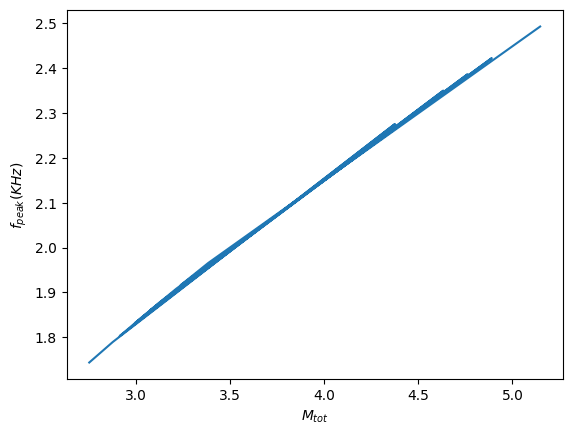

In [131]:
#Plotting 
plot.plot(Mtot,fpeak)
plot.ylabel("$f_{peak} (KHz)$")
plot.xlabel("$M_{tot}$")

In [124]:
##Empirical Relation

In [132]:
#fpeak from Vretinaris numerical simulation paper (R_1.4)

def Mchirp1(m1,q):
    return ((q*(m1**2))**(3/5))/((m1+q*m1)**1/5)

def empirical_relation(Mchirp,R):
    b0 = 1.5220
    b1 = 8.4021
    b2 = 2.3876
    b3 = -1.1133
    b4 = -0.1291
    b5 = 0.0366
    bs = np.array([ 1.52195893,  8.40212799,  2.38758442, -1.11330912, -0.12909556,
        0.03661978])
    quants = np.array([1, Mchirp, Mchirp**2, Mchirp*R, R*Mchirp**2, Mchirp*R**2])
    #return np.dot(bs, quants)
    return b0 + b1*(Mchirp) + b2*(Mchirp**2) + b3*(Mchirp*R) + b4*((Mchirp**2)*R) + b5*(Mchirp*(R**2))


In [136]:
#Defining the Mchirp

q = [0.5,0.55,0.6,0.65,0.7]
m1 = [1.1,1.15,1.75]
#q = [1.2/1.3, 1.3/1.4, 1.4/1.5]

Mchirp = []

for i in q:
    for j in m1:
       Mchirp.append(Mchirp1(q = i ,m1 = j))
Mchirp

[2.2415027959086977,
 2.2615193913810114,
 2.45962193599092,
 2.29685964220653,
 2.317370573711344,
 2.520365520031924,
 2.344333043179584,
 2.365267911636298,
 2.5724585259485555,
 2.385133054482064,
 2.4064322665938453,
 2.6172287591025913,
 2.4202400536436843,
 2.44185277087433,
 2.6557519969064196]

In [127]:
#Polytrope kappa = 0.05, Pc = 8.32199 , GA = 5/3,    R_1.6 = 11.27km
Mchirp = np.linspace(1, 1.8, 10)
fpeak = []

for i in Mchirp:
  fpeak.append(empirical_relation( Mchirp = i ,R = 11.27))

fpeak

[2.958524140000003,
 3.1764858057777783,
 3.4091855337777797,
 3.656623324000003,
 3.918799176444451,
 4.1957130911111165,
 4.487365068000001,
 4.793755107111117,
 5.114883208444449,
 5.4507493720000015]

In [128]:
# #Mchirp1(q = 1.2/1.5 ,m1 = 1.5)
# m1 = np.linspace(0.94, 1.94, 100)
# m2 = m1[::-1]
# q = m2/m1
# Mchirp = [Mchirp1(_q, _m1) for (_q, _m1) in zip(q, m1)]
# Mtot = m1+m2
# plot.plot(Mtot, Mchirp)

In [74]:
#empirical_relation( Mchirp = 2.63  , R = 12)

In [113]:
Mchirp

[2.8706468064662944,
 2.8650204403463624,
 2.859336868315545,
 2.8535982232796844,
 2.8478065529383367,
 2.8419638233016427,
 2.8360719220336716,
 2.830132661631983,
 2.82414778245247,
 2.8181189555880146,
 2.8120477856088977,
 2.805935813172431,
 2.799784517508811,
 2.7935953187897473,
 2.78736958038602,
 2.78110861101976,
 2.7748136668168546,
 2.7684859532646136,
 2.7621266270794678,
 2.7557367979892167,
 2.7493175304340878,
 2.742869845190592,
 2.736394720921933,
 2.729893095658546,
 2.7233658682120785,
 2.7168138995259814,
 2.710238013965694,
 2.703639000551198,
 2.6970176141346203,
 2.690374576525359,
 2.683710577565108,
 2.677026276154992,
 2.6703223012369337,
 2.6635992527312227,
 2.656857702432178,
 2.6500981948636633,
 2.643321248096146,
 2.636527354526874,
 2.629716981624661,
 2.6228905726407055,
 2.6160485472867685,
 2.6091913023819746,
 2.602319212469417,
 2.5954326304036965,
 2.5885318879104564,
 2.5816172961188935,
 2.574689146068204,
 2.567747709188834,
 2.56079323775936